#**Network Slicing using Supervised Learning**



In [16]:
# Random Seed for Under-sampling, Data-split and Modeling
import random
#Under-sampling
# a = random.randint(10, 99)
a = 42

# Data-split labelled and unlabelled
# b1 = random.randint(10, 99)
b1 = 42

#Data-split train and test
b2 = 42

#Data Modeling
# c = 42

#Data-split labelled and unlabelled
# Z = 0.001

undersampling = 'no'
tsne = 'no'

top_features_count = 10
selected_features_count = 50

In [2]:
a

42

In [3]:
b1

42

# **Data Pre-processing**

### **Import Libraries**

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, silhouette_samples, silhouette_score, adjusted_rand_score, accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve, average_precision_score, roc_curve, roc_auc_score, auc
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.manifold import TSNE
from sklearn.model_selection import GridSearchCV

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from pandas.plotting import parallel_coordinates
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Rectangle, Circle, Ellipse, Polygon, Wedge, Arrow

import numpy as np
import pandas as pd
import random
import time

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
start_time_data_preprocessing = time.time()

### **Load Dataset**

In [7]:
# data = pd.read_csv('/content/drive/MyDrive/Dataset/train_dataset.zip')
# data = pd.read_csv('/content/drive/MyDrive/Dataset/deepslice_data.csv.zip')
data = pd.read_csv('/content/drive/MyDrive/Dataset/5G_SliciNdd_preprocessed.csv')
data

,X,Seq,Dur,RunTime,Mean,Sum,Min,Max,Proto,sTos,...,State,SrcWin,DstWin,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,UniqueID,SliceType
0,34555.0000,982.000000,0.000289,0.000289,0.000289,0.000289,0.000289,0.000289,4,224,...,1,64128.000,64256.00000,3904203819,3.704605e+09,0.000000,0.000000,0.000000,144379.000,URLLC
1,531568.0000,11362.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4,0,...,4,1270506.667,63695.85949,1836252122,2.446250e+09,0.000000,0.000000,0.000000,181691.000,URLLC
2,360399.0000,70834.000000,2.560251,2.560251,2.560251,2.560251,2.560251,2.560251,4,0,...,5,1270506.667,63695.85949,1836252122,2.446250e+09,0.000000,0.000000,0.000000,175580.000,URLLC
3,30702.0000,440.000000,0.046014,0.046014,0.046014,0.046014,0.046014,0.046014,4,0,...,1,56960.000,77568.00000,97975463,3.508802e+09,0.000000,0.000000,0.000000,120239.000,URLLC
4,312747.0000,128397.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4,0,...,4,1270506.667,63695.85949,1836252122,2.446250e+09,0.000000,0.000000,0.000000,348612.000,URLLC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14451,455292.3772,281.829734,3.620188,3.961441,3.642492,4.080528,3.689328,3.684907,3,0,...,1,64256.000,64896.00000,1202036791,1.485176e+08,0.595314,0.723920,0.032170,2373584.832,mMTC
14452,455262.0258,298.318232,4.376486,2.966175,3.594366,3.873222,3.280655,3.083385,3,0,...,1,64256.000,64896.00000,1202036791,1.485176e+08,0.652207,0.874332,0.028468,2367298.319,mMTC
14453,455286.2470,293.324452,3.818366,3.667252,4.340313,4.514485,3.882577,4.103266,3,0,...,1,64256.000,64896.00000,1202036791,1.485176e+08,0.876566,0.250007,0.041358,2383580.426,mMTC
14454,455211.1026,171.202752,4.414447,4.101491,4.156414,4.301263,4.173065,4.550792,3,0,...,1,64256.000,64896.00000,1202036791,1.485176e+08,0.547553,0.645027,0.027258,2384145.715,mMTC


In [8]:
data_backup = data
data_backup

,X,Seq,Dur,RunTime,Mean,Sum,Min,Max,Proto,sTos,...,State,SrcWin,DstWin,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,UniqueID,SliceType
0,34555.0000,982.000000,0.000289,0.000289,0.000289,0.000289,0.000289,0.000289,4,224,...,1,64128.000,64256.00000,3904203819,3.704605e+09,0.000000,0.000000,0.000000,144379.000,URLLC
1,531568.0000,11362.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4,0,...,4,1270506.667,63695.85949,1836252122,2.446250e+09,0.000000,0.000000,0.000000,181691.000,URLLC
2,360399.0000,70834.000000,2.560251,2.560251,2.560251,2.560251,2.560251,2.560251,4,0,...,5,1270506.667,63695.85949,1836252122,2.446250e+09,0.000000,0.000000,0.000000,175580.000,URLLC
3,30702.0000,440.000000,0.046014,0.046014,0.046014,0.046014,0.046014,0.046014,4,0,...,1,56960.000,77568.00000,97975463,3.508802e+09,0.000000,0.000000,0.000000,120239.000,URLLC
4,312747.0000,128397.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4,0,...,4,1270506.667,63695.85949,1836252122,2.446250e+09,0.000000,0.000000,0.000000,348612.000,URLLC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14451,455292.3772,281.829734,3.620188,3.961441,3.642492,4.080528,3.689328,3.684907,3,0,...,1,64256.000,64896.00000,1202036791,1.485176e+08,0.595314,0.723920,0.032170,2373584.832,mMTC
14452,455262.0258,298.318232,4.376486,2.966175,3.594366,3.873222,3.280655,3.083385,3,0,...,1,64256.000,64896.00000,1202036791,1.485176e+08,0.652207,0.874332,0.028468,2367298.319,mMTC
14453,455286.2470,293.324452,3.818366,3.667252,4.340313,4.514485,3.882577,4.103266,3,0,...,1,64256.000,64896.00000,1202036791,1.485176e+08,0.876566,0.250007,0.041358,2383580.426,mMTC
14454,455211.1026,171.202752,4.414447,4.101491,4.156414,4.301263,4.173065,4.550792,3,0,...,1,64256.000,64896.00000,1202036791,1.485176e+08,0.547553,0.645027,0.027258,2384145.715,mMTC


In [9]:
data.columns.tolist()

['X',
 'Seq',
 'Dur',
 'RunTime',
 'Mean',
 'Sum',
 'Min',
 'Max',
 'Proto',
 'sTos',
 'dTos',
 'sDSb',
 'dDSb',
 'sTtl',
 'dTtl',
 'sHops',
 'dHops',
 'Cause',
 'TotPkts',
 'SrcPkts',
 'DstPkts',
 'TotBytes',
 'SrcBytes',
 'DstBytes',
 'Offset',
 'sMeanPktSz',
 'dMeanPktSz',
 'Load',
 'SrcLoad',
 'DstLoad',
 'Loss',
 'SrcLoss',
 'DstLoss',
 'pLoss',
 'SrcGap',
 'DstGap',
 'Rate',
 'SrcRate',
 'DstRate',
 'State',
 'SrcWin',
 'DstWin',
 'SrcTCPBase',
 'DstTCPBase',
 'TcpRtt',
 'SynAck',
 'AckDat',
 'UniqueID',
 'SliceType']

In [10]:
data = data.drop(data.columns[0], axis=1)
data

,Seq,Dur,RunTime,Mean,Sum,Min,Max,Proto,sTos,dTos,...,State,SrcWin,DstWin,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,UniqueID,SliceType
0,982.000000,0.000289,0.000289,0.000289,0.000289,0.000289,0.000289,4,224,184.000000,...,1,64128.000,64256.00000,3904203819,3.704605e+09,0.000000,0.000000,0.000000,144379.000,URLLC
1,11362.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4,0,0.257735,...,4,1270506.667,63695.85949,1836252122,2.446250e+09,0.000000,0.000000,0.000000,181691.000,URLLC
2,70834.000000,2.560251,2.560251,2.560251,2.560251,2.560251,2.560251,4,0,0.257735,...,5,1270506.667,63695.85949,1836252122,2.446250e+09,0.000000,0.000000,0.000000,175580.000,URLLC
3,440.000000,0.046014,0.046014,0.046014,0.046014,0.046014,0.046014,4,0,0.000000,...,1,56960.000,77568.00000,97975463,3.508802e+09,0.000000,0.000000,0.000000,120239.000,URLLC
4,128397.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4,0,0.257735,...,4,1270506.667,63695.85949,1836252122,2.446250e+09,0.000000,0.000000,0.000000,348612.000,URLLC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14451,281.829734,3.620188,3.961441,3.642492,4.080528,3.689328,3.684907,3,0,0.000000,...,1,64256.000,64896.00000,1202036791,1.485176e+08,0.595314,0.723920,0.032170,2373584.832,mMTC
14452,298.318232,4.376486,2.966175,3.594366,3.873222,3.280655,3.083385,3,0,0.000000,...,1,64256.000,64896.00000,1202036791,1.485176e+08,0.652207,0.874332,0.028468,2367298.319,mMTC
14453,293.324452,3.818366,3.667252,4.340313,4.514485,3.882577,4.103266,3,0,0.000000,...,1,64256.000,64896.00000,1202036791,1.485176e+08,0.876566,0.250007,0.041358,2383580.426,mMTC
14454,171.202752,4.414447,4.101491,4.156414,4.301263,4.173065,4.550792,3,0,0.000000,...,1,64256.000,64896.00000,1202036791,1.485176e+08,0.547553,0.645027,0.027258,2384145.715,mMTC


### **Data Distribution**

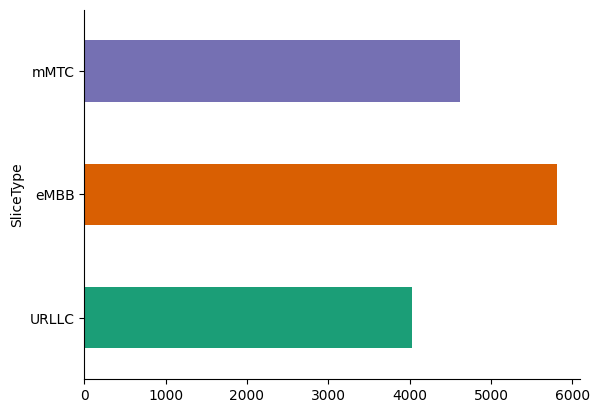

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('SliceType').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

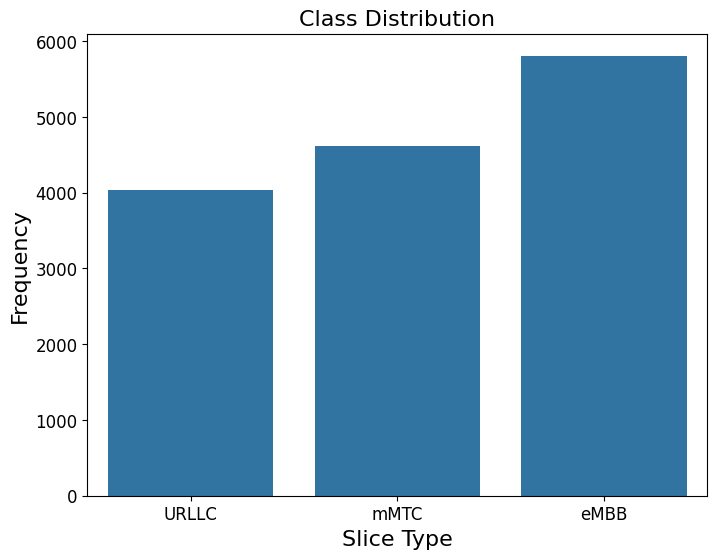

In [ ]:
df = data.copy()

# Class Distribution Plot
plt.figure(figsize=(8, 6))
sns.countplot(x='SliceType', data=df)
plt.title('Class Distribution', fontsize=16)
plt.xlabel('Slice Type', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

#### Heatmaps

In [ ]:
# # Create a heatmap for the correlation matrix of all features
# plt.figure(figsize=(14, 8))
# sns.heatmap(data.iloc[:, :-1].corr(), annot=True, annot_kws={"size": 8})
# plt.title('Heatmap (Feature Distribution)')
# plt.show()

### **Relevant Feature Selection**

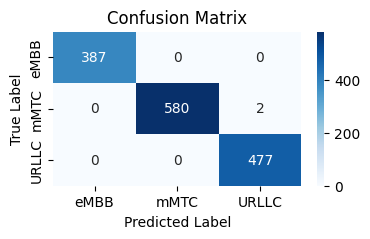

              precision    recall  f1-score   support

       URLLC     1.0000    1.0000    1.0000       387
        eMBB     1.0000    0.9966    0.9983       582
        mMTC     0.9958    1.0000    0.9979       477

    accuracy                         0.9986      1446
   macro avg     0.9986    0.9989    0.9987      1446
weighted avg     0.9986    0.9986    0.9986      1446



In [ ]:
from sklearn.ensemble import RandomForestClassifier

X = df.drop('SliceType', axis=1)
y = df['SliceType']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)
# y_pred

# Print confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['eMBB', 'mMTC', 'URLLC'], yticklabels=['eMBB', 'mMTC', 'URLLC'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Print classification report
print(classification_report(y_test, y_pred, digits=4))

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

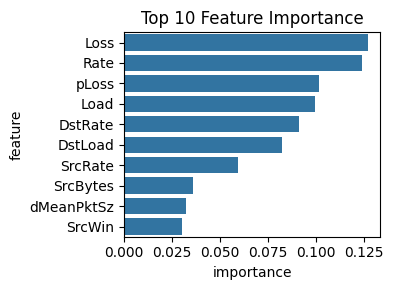


Top 10 Important Features:
       feature  importance
29        Loss    0.127238
35        Rate    0.124041
32       pLoss    0.101965
26        Load    0.099586
37     DstRate    0.091185
28     DstLoad    0.082663
36     SrcRate    0.059462
21    SrcBytes    0.036058
25  dMeanPktSz    0.032317
39      SrcWin    0.029963


In [ ]:
# Plot feature importance
plt.figure(figsize=(4,3))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title('Top 10 Feature Importance')
plt.tight_layout()
plt.show()

print("\nTop 10 Important Features:")
print(feature_importance.head(10))

In [ ]:
X.head()

,Seq,Dur,RunTime,Mean,Sum,Min,Max,Proto,sTos,dTos,...,DstRate,State,SrcWin,DstWin,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,UniqueID
0,982.0,0.000289,0.000289,0.000289,0.000289,0.000289,0.000289,4,224,184.000000,...,0.000000,1,64128.000,64256.00000,3904203819,3.704605e+09,0.0,0.0,0.0,144379.0
1,11362.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4,0,0.257735,...,0.000000,4,1270506.667,63695.85949,1836252122,2.446250e+09,0.0,0.0,0.0,181691.0
2,70834.0,2.560251,2.560251,2.560251,2.560251,2.560251,2.560251,4,0,0.257735,...,0.000000,5,1270506.667,63695.85949,1836252122,2.446250e+09,0.0,0.0,0.0,175580.0
3,440.0,0.046014,0.046014,0.046014,0.046014,0.046014,0.046014,4,0,0.000000,...,43.465034,1,56960.000,77568.00000,97975463,3.508802e+09,0.0,0.0,0.0,120239.0
4,128397.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4,0,0.257735,...,0.000000,4,1270506.667,63695.85949,1836252122,2.446250e+09,0.0,0.0,0.0,348612.0


In [ ]:
top_features = feature_importance['feature'].head(top_features_count).tolist()
# top_features = feature_importance['feature'][start_index:end_index].tolist()
print(top_features)

['Loss', 'Rate', 'pLoss', 'Load', 'DstRate', 'DstLoad', 'SrcRate', 'SrcBytes', 'dMeanPktSz', 'SrcWin']


In [ ]:
print("\n Selecting top features")
X = X[top_features]
X.head()


 Selecting top features


,Loss,Rate,pLoss,Load,DstRate,DstLoad,SrcRate,SrcBytes,dMeanPktSz,SrcWin
0,0.0,3460.207764,0.0,0.000000,0.000000,0.00000,0.000000,64.0,60.000000,64128.000
1,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,74.0,0.000000,1270506.667
2,0.0,0.390587,0.0,131.237137,0.000000,0.00000,0.390587,84.0,0.000000,1270506.667
3,0.0,108.662582,0.0,84843.742190,43.465034,23297.25781,43.465034,530.0,66.666664,56960.000
4,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,42.0,0.000000,1270506.667


In [ ]:
X

,Loss,Rate,pLoss,Load,DstRate,DstLoad,SrcRate,SrcBytes,dMeanPktSz,SrcWin
0,0.000000,3460.207764,0.000000,0.000000,0.000000,0.000000,0.000000,64.000000,60.000000,64128.000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,74.000000,0.000000,1270506.667
2,0.000000,0.390587,0.000000,131.237137,0.000000,0.000000,0.390587,84.000000,0.000000,1270506.667
3,0.000000,108.662582,0.000000,84843.742190,43.465034,23297.257810,43.465034,530.000000,66.666664,56960.000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,42.000000,0.000000,1270506.667
...,...,...,...,...,...,...,...,...,...,...
14451,2.000000,3.821267,10.105935,2415.138241,1.594339,901.270514,2.019412,895.921888,68.162787,64256.000
14452,1.257694,3.722216,9.210293,2471.046868,1.400239,763.222253,2.029394,767.564275,67.734197,64256.000
14453,2.000000,3.840632,10.360201,2283.097961,1.626468,855.459521,2.037339,910.348377,68.009158,64256.000
14454,1.609694,3.244096,7.659634,2106.446226,1.408035,699.197109,1.797084,839.936962,67.815812,64256.000


In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
X_train

,Loss,Rate,pLoss,Load,DstRate,DstLoad,SrcRate,SrcBytes,dMeanPktSz,SrcWin
247,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,42.000000,0.000000,1.270507e+06
10005,1.000000,76.109599,4.778971,367913.309600,35.756334,379530.112500,34.676228,573.288476,1217.400024,5.670400e+04
11390,10.414807,9.699842,24.656984,11206.546320,3.849965,3562.558961,8.565079,968.398139,130.719774,9.164800e+04
12018,1.000000,12.450785,1.799957,37024.643430,6.916404,12404.117280,5.400381,13235.815300,252.551221,4.094000e+03
10117,1.000000,30.843046,4.199761,131602.669700,14.557017,119449.836400,13.120906,1239.115724,1026.166626,5.619200e+04
...,...,...,...,...,...,...,...,...,...,...
5191,1.000000,44.364562,0.556081,342301.958500,29.836329,326201.503400,5.482154,4671.828855,1356.633172,5.696000e+04
13418,1.000000,4.223407,9.310396,4342.127966,2.151351,3252.759624,1.455812,329.918593,242.991987,1.677696e+07
5390,1.000000,76.774407,5.443820,376826.536600,53.991845,446399.017900,27.727192,590.362162,1065.783469,5.696000e+04
860,0.000000,0.388583,0.000000,130.563934,0.000000,0.000000,0.388583,84.000000,0.000000,1.270507e+06


In [ ]:
X_test

,Loss,Rate,pLoss,Load,DstRate,DstLoad,SrcRate,SrcBytes,dMeanPktSz,SrcWin
3146,0.000000,0.439606,0.000000,1.477076e+02,0.000000,0.000000e+00,0.439606,84.000000,0.000000,1270506.667
14090,1.000000,3.632123,5.716374,2.263857e+03,1.463701,7.849698e+02,1.928375,900.339579,67.055171,64256.000
13473,1.000000,3.721983,5.400960,2.541616e+03,1.422970,7.653655e+02,1.994199,925.340938,67.135955,64256.000
14074,1.000000,3.556572,6.086617,2.171078e+03,1.359428,7.381477e+02,1.739120,807.662359,67.467081,64256.000
13012,1.000000,4.217047,8.913024,4.715410e+03,2.809133,3.911684e+03,2.193221,328.985211,237.325137,64128.000
...,...,...,...,...,...,...,...,...,...,...
4400,1.000000,433.703094,0.238095,3.120230e+06,263.542084,2.934929e+06,169.123459,22460.000000,1392.058838,791552.000
11304,20.572235,12.715422,25.049085,1.105081e+04,4.237611,4.956829e+03,8.261310,4128.682567,133.186053,91648.000
1199,0.000000,9090.909180,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,118.000000,114.000000,64128.000
9024,1.000000,80.389627,4.803786,3.812774e+05,36.276322,3.480347e+05,28.639757,559.158905,1217.400024,56704.000


In [ ]:
y_train

,SliceType
247,URLLC
10005,eMBB
11390,mMTC
12018,mMTC
10117,eMBB
...,...
5191,eMBB
13418,mMTC
5390,eMBB
860,URLLC


In [ ]:
y_test

,SliceType
3146,URLLC
14090,mMTC
13473,mMTC
14074,mMTC
13012,mMTC
...,...
4400,eMBB
11304,mMTC
1199,URLLC
9024,eMBB


#### Heatmaps

In [ ]:
# # Create a heatmap for the correlation matrix of all selected features
# plt.figure(figsize=(14, 8))
# sns.heatmap(data[features].corr(), annot=True, annot_kws={"size": 8})
# plt.title('Heatmap (Feature Distribution) with selected features')
# plt.show()

In [ ]:
end_time_data_preprocessing = time.time()

# **RANDOM FOREST CLASSIFIER**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model_RFC = RandomForestClassifier()
model_RFC.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred_RFC = model_RFC.predict(X_test)

In [ ]:
accuracy_RFC = accuracy_score(y_test, y_pred_RFC)
print(f"Accuracy: {accuracy_RFC:.4f}")

precision_RFC = precision_score(y_test, y_pred_RFC, average='weighted')
print(f"Precision: {precision_RFC:.2f}")

recall_RFC = recall_score(y_test, y_pred_RFC, average='weighted')
print(f"Recall: {recall_RFC:.2f}")

f1score_RFC = f1_score(y_test, y_pred_RFC, average='weighted')
print(f"F1-score: {f1score_RFC:.2f}")

Accuracy: 0.9986
Precision: 1.00
Recall: 1.00
F1-score: 1.00


In [ ]:
print(classification_report(y_test, y_pred_RFC))

              precision    recall  f1-score   support

       URLLC       1.00      1.00      1.00       387
        eMBB       1.00      1.00      1.00       582
        mMTC       1.00      1.00      1.00       477

    accuracy                           1.00      1446
   macro avg       1.00      1.00      1.00      1446
weighted avg       1.00      1.00      1.00      1446



In [ ]:
print(confusion_matrix(y_test, y_pred_RFC))

[[387   0   0]
 [  0 580   2]
 [  0   0 477]]


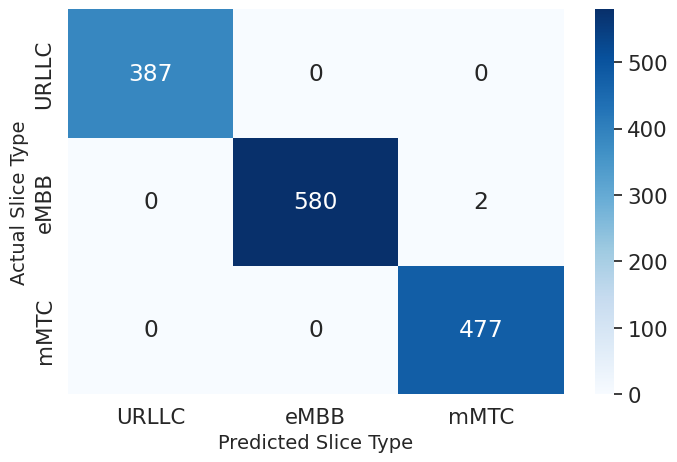

In [ ]:
# Confusion Matrix
cm_RFC = confusion_matrix(y_test, y_pred_RFC)
plt.figure(figsize=(8, 5))

# Set font size for all text elements
sns.set(font_scale=1.4)  # This sets the font size to approximately 14 for heatmap labels

# Create heatmap
sns.heatmap(cm_RFC, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
# plt.title('Confusion Matrix for RFC')
plt.xlabel('Predicted Slice Type', fontsize=14)
plt.ylabel('Actual Slice Type', fontsize=14)

# # Add a legend to indicate class labels
# classes = np.unique(y)
# plt.xticks(np.arange(len(classes)) + 0.5, classes, rotation=45)
# plt.yticks(np.arange(len(classes)) + 0.5, classes, rotation=0)

plt.show()

In [ ]:
# # Get the column names from the original DataFrame
# X_test_column_names = X.columns.tolist()

# # Convert X_test to a pandas DataFrame
# X_test_df_RFC = pd.DataFrame(X_test, columns=X_test_column_names)  # Replace X_test_column_names with your actual column names
# X_test_with_predictions_RFC = X_test_df_RFC.copy()  # Create a copy to avoid modifying the original DataFrame

# # Resetting indices to avoid alignment issues
# X_test_with_predictions_RFC.reset_index(drop=True, inplace=True)
# y_test.reset_index(drop=True, inplace=True)
# y_pred_RFC = pd.Series(y_pred_RFC, name='Predicted_Slice_Type')  # Convert y_pred to a pandas Series

# # Add y_test and y_pred columns to the DataFrame
# X_test_with_predictions_RFC['Actual_Slice_Type'] = y_test
# X_test_with_predictions_RFC['Predicted_Slice_Type'] = y_pred_RFC

In [ ]:
# X_test_column_names

In [ ]:
# X_test_with_predictions_RFC.head(20)

In [ ]:
# # Precision-Recall Curve for Multi-Class

# # Binarize the labels
# y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
# y_pred_RFC_bin = label_binarize(y_pred_RFC, classes=np.unique(y_pred_RFC))

# # Calculate precision-recall curve
# precision = dict()
# recall = dict()
# average_precision = dict()

# # Loop over each class
# for i in range(len(np.unique(y_test))):
#     precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_pred_RFC_bin[:, i])
#     average_precision[i] = average_precision_score(y_test_bin[:, i], y_pred_RFC_bin[:, i])

# # Compute micro-average precision-recall curve and its average precision
# precision["micro"], recall["micro"], _ = precision_recall_curve(y_test_bin.ravel(), y_pred_RFC_bin.ravel())
# average_precision["micro"] = average_precision_score(y_test_bin, y_pred_RFC_bin, average="micro")

# # Plot micro-average Precision-Recall curve
# plt.figure(figsize=(8, 6))
# plt.step(recall['micro'], precision['micro'], color='b', alpha=0.2, where='post')
# plt.fill_between(recall["micro"], precision["micro"], step='post', alpha=0.2, color='b')
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.title(f'Micro-average Precision-Recall Curve (Average Precision = {average_precision["micro"]:.2f})')
# plt.show()

In [ ]:
# # ROC Curve for Multi-Class

# # Binarize the labels
# # y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
# # y_pred_RFC_bin = label_binarize(y_pred_RFC, classes=np.unique(y_pred_RFC))

# # Calculate ROC curve
# fpr = dict()
# tpr = dict()
# roc_auc = dict()

# # Loop over each class
# for i in range(len(np.unique(y_test))):
#     fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_RFC_bin[:, i])
#     roc_auc[i] = auc(fpr[i], tpr[i])

# # Compute micro-average ROC curve and its AUC
# fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_pred_RFC_bin.ravel())
# roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# # Plot micro-average ROC curve
# plt.figure(figsize=(8, 6))
# plt.plot(fpr['micro'], tpr['micro'], color='darkorange', lw=2, label=f'Micro-average ROC Curve (AUC = {roc_auc["micro"]:.2f})')
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend()
# plt.show()

# **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred_LR = model_LR.predict(X_test)

In [ ]:
accuracy_LR = accuracy_score(y_test, y_pred_LR)
print(f'Accuracy: {accuracy_LR}')

Accuracy: 0.42323651452282157


In [ ]:
accuracy_LR = accuracy_score(y_test, y_pred_LR)
print(f"Accuracy: {accuracy_LR:.2f}")

precision_LR = precision_score(y_test, y_pred_LR, average='weighted')
print(f"Precision: {precision_LR:.2f}")

recall_LR = recall_score(y_test, y_pred_LR, average='weighted')
print(f"Recall: {recall_LR:.2f}")

f1score_LR = f1_score(y_test, y_pred_LR, average='weighted')
print(f"F1-score: {f1score_LR:.2f}")

Accuracy: 0.42
Precision: 0.45
Recall: 0.42
F1-score: 0.42


In [ ]:
print(classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

       URLLC       0.04      0.04      0.04       387
        eMBB       0.69      0.49      0.57       582
        mMTC       0.47      0.65      0.55       477

    accuracy                           0.42      1446
   macro avg       0.40      0.39      0.39      1446
weighted avg       0.45      0.42      0.42      1446



In [ ]:
print(confusion_matrix(y_test, y_pred_LR))

[[ 15  25 347]
 [297 285   0]
 [ 64 101 312]]


In [ ]:
# # Feature Importance
# feature_importance = model_LR.coef_[0]
# # features = np.arange(len(feature_importance))

# plt.figure(figsize=(2 * len(features), 6))
# plt.bar(features, feature_importance)
# plt.title('Feature Importance')
# plt.xlabel('Feature Name')
# plt.ylabel('Coefficient Value')
# plt.show()

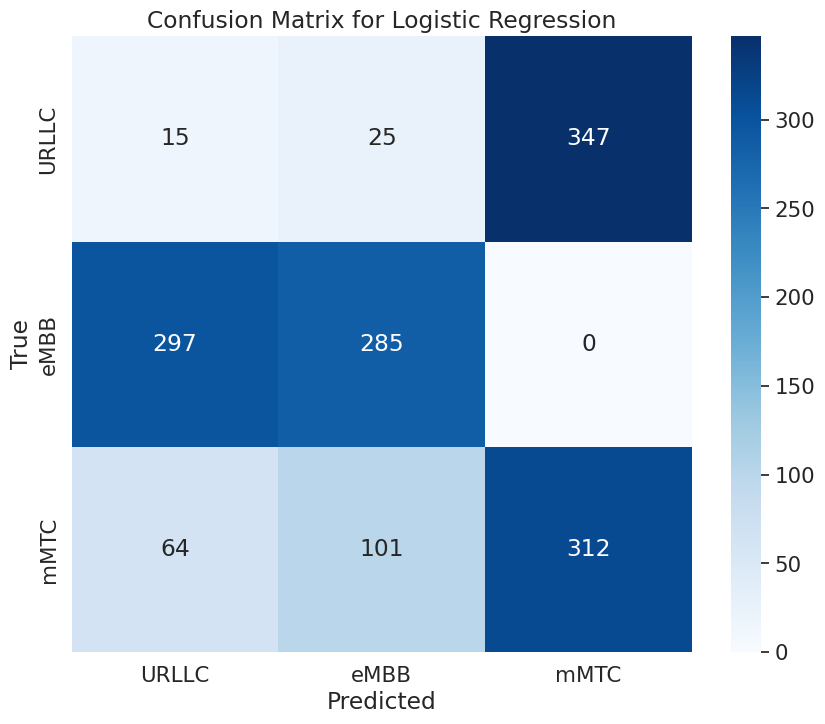

In [ ]:
# Confusion Matrix
cm_LR = confusion_matrix(y_test, y_pred_LR)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_LR, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')

# # Add a legend to indicate class labels
# classes = np.unique(y)
# plt.xticks(np.arange(len(classes)) + 0.5, classes, rotation=45)
# plt.yticks(np.arange(len(classes)) + 0.5, classes, rotation=0)

plt.show()

In [ ]:
# # Get the column names from the original DataFrame
# X_test_column_names = X.columns.tolist()

# # Convert X_test to a pandas DataFrame
# X_test_df_LR = pd.DataFrame(X_test, columns=X_test_column_names)  # Replace X_test_column_names with your actual column names
# X_test_with_predictions_LR = X_test_df_LR.copy()  # Create a copy to avoid modifying the original DataFrame

# # Resetting indices to avoid alignment issues
# X_test_with_predictions_LR.reset_index(drop=True, inplace=True)
# y_test.reset_index(drop=True, inplace=True)
# y_pred_LR = pd.Series(y_pred_LR, name='Predicted_Slice_Type')  # Convert y_pred to a pandas Series

# # Add y_test and y_pred columns to the DataFrame
# X_test_with_predictions_LR['Actual_Slice_Type'] = y_test
# X_test_with_predictions_LR['Predicted_Slice_Type'] = y_pred_LR

In [ ]:
# X_test_with_predictions_LR.head(20)

In [ ]:
# # Precision-Recall Curve for Multi-Class

# # Binarize the labels
# y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
# y_pred_LR_bin = label_binarize(y_pred_LR, classes=np.unique(y_pred_LR))

# # Calculate precision-recall curve
# precision = dict()
# recall = dict()
# average_precision = dict()

# # Loop over each class
# for i in range(len(np.unique(y_test))):
#     precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_pred_LR_bin[:, i])
#     average_precision[i] = average_precision_score(y_test_bin[:, i], y_pred_LR_bin[:, i])

# # Compute micro-average precision-recall curve and its average precision
# precision["micro"], recall["micro"], _ = precision_recall_curve(y_test_bin.ravel(), y_pred_LR_bin.ravel())
# average_precision["micro"] = average_precision_score(y_test_bin, y_pred_LR_bin, average="micro")

# # Plot micro-average Precision-Recall curve
# plt.figure(figsize=(8, 6))
# plt.step(recall['micro'], precision['micro'], color='b', alpha=0.2, where='post')
# plt.fill_between(recall["micro"], precision["micro"], step='post', alpha=0.2, color='b')
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.title(f'Micro-average Precision-Recall Curve (Average Precision = {average_precision["micro"]:.2f})')
# plt.show()

In [ ]:
# # ROC Curve for Multi-Class

# # Binarize the labels
# # y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
# # y_pred_LR_bin = label_binarize(y_pred_LR, classes=np.unique(y_pred_LR))

# # Calculate ROC curve
# fpr = dict()
# tpr = dict()
# roc_auc = dict()

# # Loop over each class
# for i in range(len(np.unique(y_test))):
#     fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_LR_bin[:, i])
#     roc_auc[i] = auc(fpr[i], tpr[i])

# # Compute micro-average ROC curve and its AUC
# fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_pred_LR_bin.ravel())
# roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# # Plot micro-average ROC curve
# plt.figure(figsize=(8, 6))
# plt.plot(fpr['micro'], tpr['micro'], color='darkorange', lw=2, label=f'Micro-average ROC Curve (AUC = {roc_auc["micro"]:.2f})')
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend()
# plt.show()

# **Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
model_NB = GaussianNB()
model_NB.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred_NB = model_NB.predict(X_test)

In [ ]:
accuracy_NB = accuracy_score(y_test, y_pred_NB)
print(f'Accuracy: {accuracy_NB}')

Accuracy: 0.45435684647302904


In [ ]:
print(classification_report(y_test, y_pred_NB))

              precision    recall  f1-score   support

       URLLC       0.35      0.02      0.03       387
        eMBB       0.54      0.98      0.70       582
        mMTC       0.21      0.17      0.19       477

    accuracy                           0.45      1446
   macro avg       0.37      0.39      0.31      1446
weighted avg       0.38      0.45      0.35      1446



In [ ]:
print(confusion_matrix(y_test, y_pred_NB))

[[  6  86 295]
 [  8 571   3]
 [  3 394  80]]


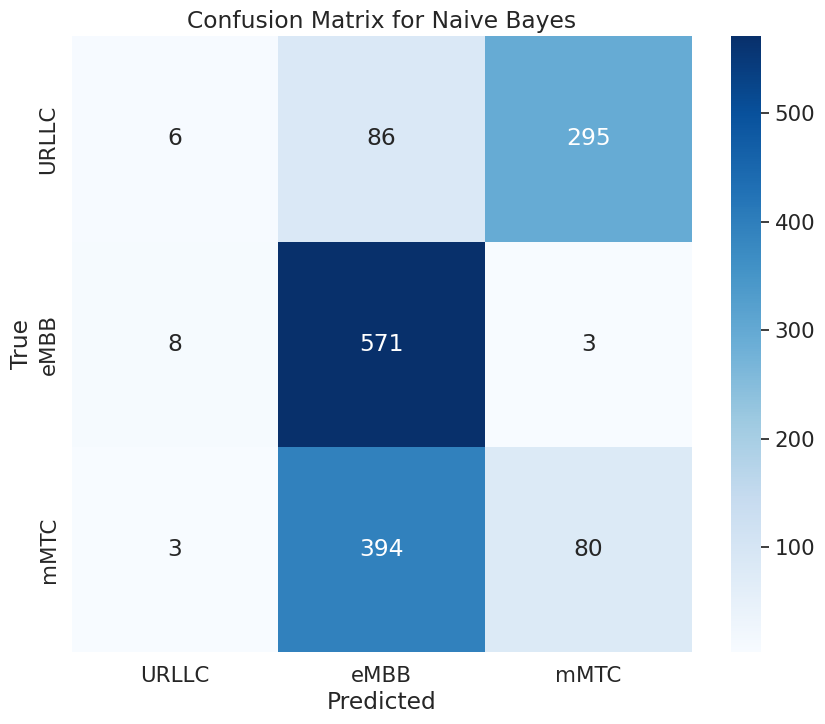

In [ ]:
# Confusion Matrix
cm_NB = confusion_matrix(y_test, y_pred_NB)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_NB, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('True')

# # Add a legend to indicate class labels
# classes = np.unique(y)
# plt.xticks(np.arange(len(classes)) + 0.5, classes, rotation=45)
# plt.yticks(np.arange(len(classes)) + 0.5, classes, rotation=0)

plt.show()

In [ ]:
# # Get the column names from the original DataFrame
# X_test_column_names = X.columns.tolist()

# # Convert X_test to a pandas DataFrame
# X_test_df_NB = pd.DataFrame(X_test, columns=X_test_column_names)  # Replace X_test_column_names with your actual column names
# X_test_with_predictions_NB = X_test_df_NB.copy()  # Create a copy to avoid modifying the original DataFrame

# # Resetting indices to avoid alignment issues
# X_test_with_predictions_NB.reset_index(drop=True, inplace=True)
# y_test.reset_index(drop=True, inplace=True)
# y_pred_NB = pd.Series(y_pred_NB, name='Predicted_Slice_Type')  # Convert y_pred to a pandas Series

# # Add y_test and y_pred columns to the DataFrame
# X_test_with_predictions_NB['Actual_Slice_Type'] = y_test
# X_test_with_predictions_NB['Predicted_Slice_Type'] = y_pred_NB

In [ ]:
# X_test_with_predictions_NB.head(20)

In [ ]:
# # Precision-Recall Curve for Multi-Class

# # Binarize the labels
# y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
# y_pred_NB_bin = label_binarize(y_pred_NB, classes=np.unique(y_pred_NB))

# # Calculate precision-recall curve
# precision = dict()
# recall = dict()
# average_precision = dict()

# # Loop over each class
# for i in range(len(np.unique(y_test))):
#     precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_pred_NB_bin[:, i])
#     average_precision[i] = average_precision_score(y_test_bin[:, i], y_pred_NB_bin[:, i])

# # Compute micro-average precision-recall curve and its average precision
# precision["micro"], recall["micro"], _ = precision_recall_curve(y_test_bin.ravel(), y_pred_NB_bin.ravel())
# average_precision["micro"] = average_precision_score(y_test_bin, y_pred_NB_bin, average="micro")

# # Plot micro-average Precision-Recall curve
# plt.figure(figsize=(8, 6))
# plt.step(recall['micro'], precision['micro'], color='b', alpha=0.2, where='post')
# plt.fill_between(recall["micro"], precision["micro"], step='post', alpha=0.2, color='b')
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.title(f'Micro-average Precision-Recall Curve (Average Precision = {average_precision["micro"]:.2f})')
# plt.show()

In [ ]:
# # ROC Curve for Multi-Class

# # Binarize the labels
# # y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
# # y_pred_NB_bin = label_binarize(y_pred_NB, classes=np.unique(y_pred_NB))

# # Calculate ROC curve
# fpr = dict()
# tpr = dict()
# roc_auc = dict()

# # Loop over each class
# for i in range(len(np.unique(y_test))):
#     fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_NB_bin[:, i])
#     roc_auc[i] = auc(fpr[i], tpr[i])

# # Compute micro-average ROC curve and its AUC
# fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_pred_NB_bin.ravel())
# roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# # Plot micro-average ROC curve
# plt.figure(figsize=(8, 6))
# plt.plot(fpr['micro'], tpr['micro'], color='darkorange', lw=2, label=f'Micro-average ROC Curve (AUC = {roc_auc["micro"]:.2f})')
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend()
# plt.show()

# **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Choose the number of neighbors (e.g., 3, 5, 7)
k = 5
model_KNN = KNeighborsClassifier(n_neighbors=k)
model_KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred_KNN = model_KNN.predict(X_test)

In [ ]:
accuracy_KNN = accuracy_score(y_test, y_pred_KNN)
print(f'Accuracy: {accuracy_KNN}')

Accuracy: 0.9778699861687413


In [ ]:
print(classification_report(y_test, y_pred_KNN))

              precision    recall  f1-score   support

       URLLC       0.98      0.97      0.98       387
        eMBB       0.97      0.99      0.98       582
        mMTC       0.98      0.97      0.97       477

    accuracy                           0.98      1446
   macro avg       0.98      0.98      0.98      1446
weighted avg       0.98      0.98      0.98      1446



In [ ]:
print(confusion_matrix(y_test, y_pred_KNN))

[[375   4   8]
 [  1 578   3]
 [  5  11 461]]


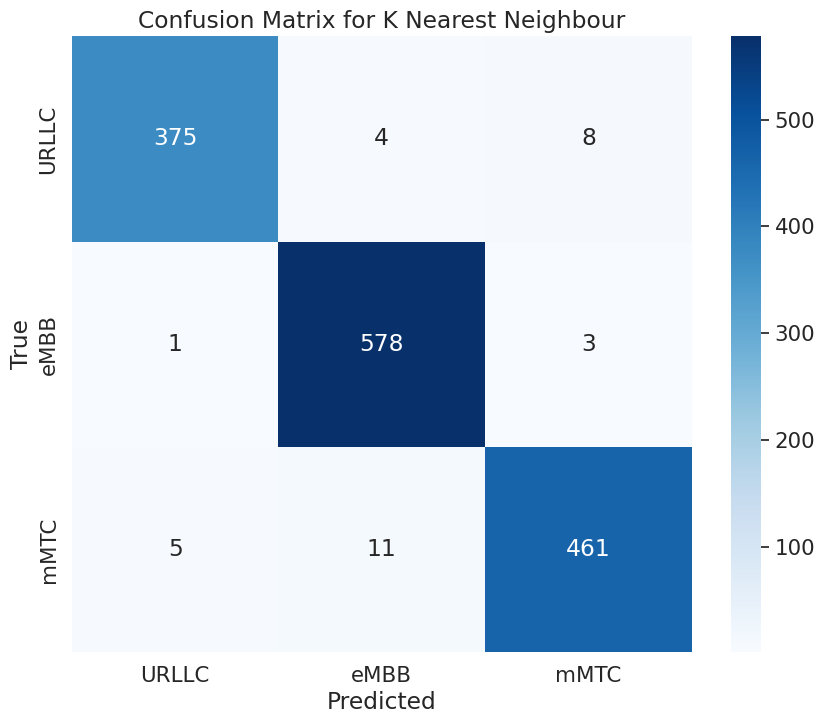

In [ ]:
# Confusion Matrix
cm_KNN = confusion_matrix(y_test, y_pred_KNN)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_KNN, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix for K Nearest Neighbour')
plt.xlabel('Predicted')
plt.ylabel('True')

# # Add a legend to indicate class labels
# classes = np.unique(y)
# plt.xticks(np.arange(len(classes)) + 0.5, classes, rotation=45)
# plt.yticks(np.arange(len(classes)) + 0.5, classes, rotation=0)

plt.show()

In [ ]:
# # Get the column names from the original DataFrame
# X_test_column_names = X.columns.tolist()

# # Convert X_test to a pandas DataFrame
# X_test_df_KNN = pd.DataFrame(X_test, columns=X_test_column_names)  # Replace X_test_column_names with your actual column names
# X_test_with_predictions_KNN = X_test_df_KNN.copy()  # Create a copy to avoid modifying the original DataFrame

# # Resetting indices to avoid alignment issues
# X_test_with_predictions_KNN.reset_index(drop=True, inplace=True)
# y_test.reset_index(drop=True, inplace=True)
# y_pred_KNN = pd.Series(y_pred_KNN, name='Predicted_Slice_Type')  # Convert y_pred to a pandas Series

# # Add y_test and y_pred columns to the DataFrame
# X_test_with_predictions_KNN['Actual_Slice_Type'] = y_test
# X_test_with_predictions_KNN['Predicted_Slice_Type'] = y_pred_KNN

In [ ]:
# X_test_with_predictions_KNN.head(20)

In [ ]:
# # Precision-Recall Curve for Multi-Class

# # Binarize the labels
# y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
# y_pred_KNN_bin = label_binarize(y_pred_KNN, classes=np.unique(y_pred_KNN))

# # Calculate precision-recall curve
# precision = dict()
# recall = dict()
# average_precision = dict()

# # Loop over each class
# for i in range(len(np.unique(y_test))):
#     precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_pred_KNN_bin[:, i])
#     average_precision[i] = average_precision_score(y_test_bin[:, i], y_pred_KNN_bin[:, i])

# # Compute micro-average precision-recall curve and its average precision
# precision["micro"], recall["micro"], _ = precision_recall_curve(y_test_bin.ravel(), y_pred_KNN_bin.ravel())
# average_precision["micro"] = average_precision_score(y_test_bin, y_pred_KNN_bin, average="micro")

# # Plot micro-average Precision-Recall curve
# plt.figure(figsize=(8, 6))
# plt.step(recall['micro'], precision['micro'], color='b', alpha=0.2, where='post')
# plt.fill_between(recall["micro"], precision["micro"], step='post', alpha=0.2, color='b')
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.title(f'Micro-average Precision-Recall Curve (Average Precision = {average_precision["micro"]:.2f})')
# plt.show()

In [ ]:
# # ROC Curve for Multi-Class

# # Binarize the labels
# # y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
# # y_pred_KNN_bin = label_binarize(y_pred_KNN, classes=np.unique(y_pred_KNN))

# # Calculate ROC curve
# fpr = dict()
# tpr = dict()
# roc_auc = dict()

# # Loop over each class
# for i in range(len(np.unique(y_test))):
#     fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_KNN_bin[:, i])
#     roc_auc[i] = auc(fpr[i], tpr[i])

# # Compute micro-average ROC curve and its AUC
# fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_pred_KNN_bin.ravel())
# roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# # Plot micro-average ROC curve
# plt.figure(figsize=(8, 6))
# plt.plot(fpr['micro'], tpr['micro'], color='darkorange', lw=2, label=f'Micro-average ROC Curve (AUC = {roc_auc["micro"]:.2f})')
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend()
# plt.show()

# **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model_DT = DecisionTreeClassifier(random_state=42)
model_DT.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred_DT = model_DT.predict(X_test)

In [ ]:
accuracy_DT = accuracy_score(y_test, y_pred_DT)
print(f'Accuracy: {accuracy_DT}')

Accuracy: 0.9972337482710927


In [ ]:
print(classification_report(y_test, y_pred_DT))

              precision    recall  f1-score   support

       URLLC       1.00      1.00      1.00       387
        eMBB       1.00      0.99      1.00       582
        mMTC       0.99      1.00      1.00       477

    accuracy                           1.00      1446
   macro avg       1.00      1.00      1.00      1446
weighted avg       1.00      1.00      1.00      1446



In [ ]:
print(confusion_matrix(y_test, y_pred_DT))

[[387   0   0]
 [  0 579   3]
 [  0   1 476]]


In [ ]:
# # Feature Importance
# feature_importance = model_DT.feature_importances_
# # features = np.arange(len(feature_importance))

# plt.figure(figsize=(2 * len(features), 6))
# plt.bar(features, feature_importance)
# plt.title('Feature Importance')
# plt.xlabel('Feature Index')
# plt.ylabel('Importance Score')
# plt.show()

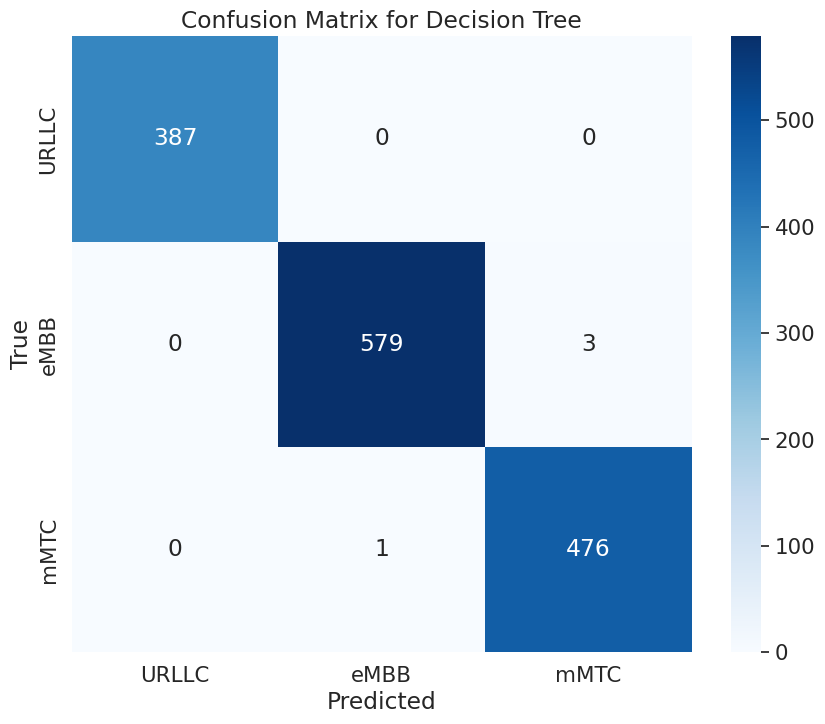

In [ ]:
# Confusion Matrix
cm_DT = confusion_matrix(y_test, y_pred_DT)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_DT, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('True')

# # Add a legend to indicate class labels
# classes = np.unique(y)
# plt.xticks(np.arange(len(classes)) + 0.5, classes, rotation=45)
# plt.yticks(np.arange(len(classes)) + 0.5, classes, rotation=0)

plt.show()

In [ ]:
# # Get the column names from the original DataFrame
# X_test_column_names = X.columns.tolist()

# # Convert X_test to a pandas DataFrame
# X_test_df_DT = pd.DataFrame(X_test, columns=X_test_column_names)  # Replace X_test_column_names with your actual column names
# X_test_with_predictions_DT = X_test_df_DT.copy()  # Create a copy to avoid modifying the original DataFrame

# # Resetting indices to avoid alignment issues
# X_test_with_predictions_DT.reset_index(drop=True, inplace=True)
# y_test.reset_index(drop=True, inplace=True)
# y_pred_DT = pd.Series(y_pred_DT, name='Predicted_Slice_Type')  # Convert y_pred to a pandas Series

# # Add y_test and y_pred columns to the DataFrame
# X_test_with_predictions_DT['Actual_Slice_Type'] = y_test
# X_test_with_predictions_DT['Predicted_Slice_Type'] = y_pred_DT

In [ ]:
# X_test_with_predictions_DT.head(20)

In [ ]:
# # Precision-Recall Curve for Multi-Class

# # Binarize the labels
# y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
# y_pred_DT_bin = label_binarize(y_pred_DT, classes=np.unique(y_pred_DT))

# # Calculate precision-recall curve
# precision = dict()
# recall = dict()
# average_precision = dict()

# # Loop over each class
# for i in range(len(np.unique(y_test))):
#     precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_pred_DT_bin[:, i])
#     average_precision[i] = average_precision_score(y_test_bin[:, i], y_pred_DT_bin[:, i])

# # Compute micro-average precision-recall curve and its average precision
# precision["micro"], recall["micro"], _ = precision_recall_curve(y_test_bin.ravel(), y_pred_DT_bin.ravel())
# average_precision["micro"] = average_precision_score(y_test_bin, y_pred_DT_bin, average="micro")

# # Plot micro-average Precision-Recall curve
# plt.figure(figsize=(8, 6))
# plt.step(recall['micro'], precision['micro'], color='b', alpha=0.2, where='post')
# plt.fill_between(recall["micro"], precision["micro"], step='post', alpha=0.2, color='b')
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.title(f'Micro-average Precision-Recall Curve (Average Precision = {average_precision["micro"]:.2f})')
# plt.show()

In [ ]:
# # ROC Curve for Multi-Class

# # Binarize the labels
# # y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
# # y_pred_DT_bin = label_binarize(y_pred_DT, classes=np.unique(y_pred_DT))

# # Calculate ROC curve
# fpr = dict()
# tpr = dict()
# roc_auc = dict()

# # Loop over each class
# for i in range(len(np.unique(y_test))):
#     fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_DT_bin[:, i])
#     roc_auc[i] = auc(fpr[i], tpr[i])

# # Compute micro-average ROC curve and its AUC
# fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_pred_DT_bin.ravel())
# roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# # Plot micro-average ROC curve
# plt.figure(figsize=(8, 6))
# plt.plot(fpr['micro'], tpr['micro'], color='darkorange', lw=2, label=f'Micro-average ROC Curve (AUC = {roc_auc["micro"]:.2f})')
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend()
# plt.show()

# **Support Vector Machine**

In [ ]:
from sklearn.svm import SVC

In [ ]:
# Types of SVM (linear, polynomial, radial basis function, etc.)
# Here, we use a linear kernel for simplicity
model_SVM = SVC(kernel='linear')
model_SVM.fit(X_train, y_train)

In [ ]:
y_pred_SVM = model_SVM.predict(X_test)

In [ ]:
accuracy_SVM = accuracy_score(y_test, y_pred_SVM)
print(f'Accuracy: {accuracy_SVM}')

In [ ]:
print(classification_report(y_test, y_pred_SVM))

In [ ]:
print(confusion_matrix(y_test, y_pred_SVM))

In [ ]:
# Confusion Matrix
cm_SVM = confusion_matrix(y_test, y_pred_SVM)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_SVM, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix for Support Vector Machine')
plt.xlabel('Predicted')
plt.ylabel('True')

# # Add a legend to indicate class labels
# classes = np.unique(y)
# plt.xticks(np.arange(len(classes)) + 0.5, classes, rotation=45)
# plt.yticks(np.arange(len(classes)) + 0.5, classes, rotation=0)

plt.show()

In [ ]:
# # Get the column names from the original DataFrame
# X_test_column_names = X.columns.tolist()

# # Convert X_test to a pandas DataFrame
# X_test_df_SVM = pd.DataFrame(X_test, columns=X_test_column_names)  # Replace X_test_column_names with your actual column names
# X_test_with_predictions_SVM = X_test_df_SVM.copy()  # Create a copy to avoid modifying the original DataFrame

# # Resetting indices to avoid alignment issues
# X_test_with_predictions_SVM.reset_index(drop=True, inplace=True)
# y_test.reset_index(drop=True, inplace=True)
# y_pred = pd.Series(y_pred_SVM, name='Predicted_Slice_Type')  # Convert y_pred to a pandas Series

# # Add y_test and y_pred columns to the DataFrame
# X_test_with_predictions_SVM['Actual_Slice_Type'] = y_test
# X_test_with_predictions_SVM['Predicted_Slice_Type'] = y_pred_SVM

In [ ]:
# X_test_with_predictions_SVM.head(20)

In [ ]:
# # Precision-Recall Curve for Multi-Class

# # Binarize the labels
# y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
# y_pred_SVM_bin = label_binarize(y_pred_SVM, classes=np.unique(y_pred_SVM))

# # Calculate precision-recall curve
# precision = dict()
# recall = dict()
# average_precision = dict()

# # Loop over each class
# for i in range(len(np.unique(y_test))):
#     precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_pred_SVM_bin[:, i])
#     average_precision[i] = average_precision_score(y_test_bin[:, i], y_pred_SVM_bin[:, i])

# # Compute micro-average precision-recall curve and its average precision
# precision["micro"], recall["micro"], _ = precision_recall_curve(y_test_bin.ravel(), y_pred_SVM_bin.ravel())
# average_precision["micro"] = average_precision_score(y_test_bin, y_pred_SVM_bin, average="micro")

# # Plot micro-average Precision-Recall curve
# plt.figure(figsize=(8, 6))
# plt.step(recall['micro'], precision['micro'], color='b', alpha=0.2, where='post')
# plt.fill_between(recall["micro"], precision["micro"], step='post', alpha=0.2, color='b')
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.title(f'Micro-average Precision-Recall Curve (Average Precision = {average_precision["micro"]:.2f})')
# plt.show()

In [ ]:
# # ROC Curve for Multi-Class

# # Binarize the labels
# # y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
# # y_pred_SVM_bin = label_binarize(y_pred_SVM, classes=np.unique(y_pred_SVM))

# # Calculate ROC curve
# fpr = dict()
# tpr = dict()
# roc_auc = dict()

# # Loop over each class
# for i in range(len(np.unique(y_test))):
#     fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_SVM_bin[:, i])
#     roc_auc[i] = auc(fpr[i], tpr[i])

# # Compute micro-average ROC curve and its AUC
# fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_pred_SVM_bin.ravel())
# roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# # Plot micro-average ROC curve
# plt.figure(figsize=(8, 6))
# plt.plot(fpr['micro'], tpr['micro'], color='darkorange', lw=2, label=f'Micro-average ROC Curve (AUC = {roc_auc["micro"]:.2f})')
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend()
# plt.show()

# **Data Perturbation**

In [13]:
from sklearn.ensemble import RandomForestClassifier

X = data.drop('SliceType', axis=1)
y = data['SliceType']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Train a Random Forest model
RFC_Model = RandomForestClassifier(n_estimators=100, random_state=42)
RFC_Model.fit(X_train, y_train)
X_test

,Seq,Dur,RunTime,Mean,Sum,Min,Max,Proto,sTos,dTos,...,DstRate,State,SrcWin,DstWin,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,UniqueID
3146,10897.000000,2.274764,2.274764,2.274764,2.274764,2.274764,2.274764,4,0,0.257735,...,0.000000,4,1270506.667,63695.85949,1836252122,2.446250e+09,0.000000,0.000000,0.000000,3.538260e+05
14090,229.258591,4.141109,4.159860,4.508846,4.349285,4.139995,4.476563,3,0,0.000000,...,1.463701,1,64256.000,64896.00000,3691999627,4.150003e+09,0.036482,0.001511,0.016450,2.199769e+06
13473,178.422297,3.743877,3.366425,4.464098,4.607841,4.379291,3.465044,3,0,0.000000,...,1.422970,1,64256.000,64896.00000,3661029902,3.128347e+08,0.052980,0.001300,0.051753,1.262996e+06
14074,170.868686,3.935611,3.809795,3.988125,3.993783,3.563485,3.871054,3,0,0.000000,...,1.359428,1,64256.000,64896.00000,3645728635,2.059269e+09,0.023083,0.001261,0.016972,2.193874e+06
13012,2339.502841,2.019092,2.020389,1.918310,1.979231,1.961954,1.949320,3,0,0.000000,...,2.809133,6,64128.000,65024.00000,421855026,1.770455e+09,0.013935,0.001552,0.012667,1.626685e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4400,29592.000000,0.963793,0.963793,0.963793,0.963793,0.963793,0.963793,3,0,0.000000,...,263.542084,1,791552.000,98560.00000,3042380553,9.372369e+07,0.035104,0.020699,0.014405,1.139068e+06
11304,76.935274,4.945987,4.610645,4.808042,4.886788,4.952790,4.870215,3,0,0.000000,...,4.237611,1,91648.000,68608.00000,543343676,3.940740e+09,0.125212,0.080419,0.050343,1.196747e+06
1199,40.000000,0.000110,0.000110,0.000110,0.000110,0.000110,0.000110,2,40,186.000000,...,0.000000,1,64128.000,64256.00000,3904203819,3.704605e+09,0.000000,0.000000,0.000000,2.526140e+05
9024,25258.870950,0.243324,0.251760,0.247878,0.241567,0.240150,0.249803,3,0,0.000000,...,36.276322,1,56704.000,64896.00000,2542815621,3.847444e+09,0.017971,0.001676,0.015842,2.215805e+06


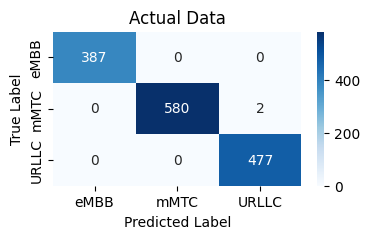

              precision    recall  f1-score   support

       URLLC     1.0000    1.0000    1.0000       387
        eMBB     1.0000    0.9966    0.9983       582
        mMTC     0.9958    1.0000    0.9979       477

    accuracy                         0.9986      1446
   macro avg     0.9986    0.9989    0.9987      1446
weighted avg     0.9986    0.9986    0.9986      1446



In [14]:
# Make predictions
y_pred = RFC_Model.predict(X_test)

# Print confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['eMBB', 'mMTC', 'URLLC'], yticklabels=['eMBB', 'mMTC', 'URLLC'])
plt.title('Actual Data')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Print classification report
print(classification_report(y_test, y_pred, digits=4))

In [15]:
# Create a copy to avoid modifying the original DataFrame
test_data_perturbed = X_test.copy()

# Resetting indices to avoid alignment issues
test_data_perturbed.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
# y_pred.reset_index(drop=True, inplace=True)

actual_label = pd.Series(y_test, name='actual_label')

# Include the 'predicted labels' as a new column in the DataFrame
test_data_perturbed['actual_label'] = actual_label
test_data_perturbed

,Seq,Dur,RunTime,Mean,Sum,Min,Max,Proto,sTos,dTos,...,State,SrcWin,DstWin,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,UniqueID,actual_label
0,10897.000000,2.274764,2.274764,2.274764,2.274764,2.274764,2.274764,4,0,0.257735,...,4,1270506.667,63695.85949,1836252122,2.446250e+09,0.000000,0.000000,0.000000,3.538260e+05,URLLC
1,229.258591,4.141109,4.159860,4.508846,4.349285,4.139995,4.476563,3,0,0.000000,...,1,64256.000,64896.00000,3691999627,4.150003e+09,0.036482,0.001511,0.016450,2.199769e+06,mMTC
2,178.422297,3.743877,3.366425,4.464098,4.607841,4.379291,3.465044,3,0,0.000000,...,1,64256.000,64896.00000,3661029902,3.128347e+08,0.052980,0.001300,0.051753,1.262996e+06,mMTC
3,170.868686,3.935611,3.809795,3.988125,3.993783,3.563485,3.871054,3,0,0.000000,...,1,64256.000,64896.00000,3645728635,2.059269e+09,0.023083,0.001261,0.016972,2.193874e+06,mMTC
4,2339.502841,2.019092,2.020389,1.918310,1.979231,1.961954,1.949320,3,0,0.000000,...,6,64128.000,65024.00000,421855026,1.770455e+09,0.013935,0.001552,0.012667,1.626685e+05,mMTC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1441,29592.000000,0.963793,0.963793,0.963793,0.963793,0.963793,0.963793,3,0,0.000000,...,1,791552.000,98560.00000,3042380553,9.372369e+07,0.035104,0.020699,0.014405,1.139068e+06,eMBB
1442,76.935274,4.945987,4.610645,4.808042,4.886788,4.952790,4.870215,3,0,0.000000,...,1,91648.000,68608.00000,543343676,3.940740e+09,0.125212,0.080419,0.050343,1.196747e+06,mMTC
1443,40.000000,0.000110,0.000110,0.000110,0.000110,0.000110,0.000110,2,40,186.000000,...,1,64128.000,64256.00000,3904203819,3.704605e+09,0.000000,0.000000,0.000000,2.526140e+05,URLLC
1444,25258.870950,0.243324,0.251760,0.247878,0.241567,0.240150,0.249803,3,0,0.000000,...,1,56704.000,64896.00000,2542815621,3.847444e+09,0.017971,0.001676,0.015842,2.215805e+06,eMBB


In [17]:
# features= ['Load', 'Rate', 'DstLoad', 'DstRate', 'Loss', 'SrcRate', 'dMeanPktSz', 'SrcLoad', 'pLoss', 'DstBytes']
features= test_data_perturbed.select_dtypes(include=[np.number]).columns
selected_features = features[:selected_features_count]

test_data_perturbed[selected_features]
print("Selected Features:", selected_features.values, "\n")

Selected Features: ['Seq' 'Dur' 'RunTime' 'Mean' 'Sum' 'Min' 'Max' 'Proto' 'sTos' 'dTos'
 'sDSb' 'dDSb' 'sTtl' 'dTtl' 'sHops' 'dHops' 'Cause' 'TotPkts' 'SrcPkts'
 'DstPkts' 'TotBytes' 'SrcBytes' 'DstBytes' 'Offset' 'sMeanPktSz'
 'dMeanPktSz' 'Load' 'SrcLoad' 'DstLoad' 'Loss' 'SrcLoss' 'DstLoss'
 'pLoss' 'SrcGap' 'DstGap' 'Rate' 'SrcRate' 'DstRate' 'State' 'SrcWin'
 'DstWin' 'SrcTCPBase' 'DstTCPBase' 'TcpRtt' 'SynAck' 'AckDat' 'UniqueID'] 



In [18]:
# Calculate the standard deviation for each numeric column
std_devs = test_data_perturbed[selected_features].std()

# Suggested noise scale as 10% of the standard deviation (you can adjust this factor)
noise_scale = std_devs * 0.1

# print(noise_scale)

# Add Gaussian noise to specific columns
for column in test_data_perturbed[selected_features].columns:
  noise = np.random.normal(0, noise_scale[column], test_data_perturbed[column].shape)
  test_data_perturbed[column] += noise

test_data_perturbed

,Seq,Dur,RunTime,Mean,Sum,Min,Max,Proto,sTos,dTos,...,State,SrcWin,DstWin,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,UniqueID,actual_label
0,10902.343415,2.355970,2.436126,2.302431,2.150969,2.168921,2.221830,4.135037,-0.050393,0.868029,...,4.215525,8.456416e+05,59255.288222,1.755193e+09,2.468440e+09,-0.005627,0.008085,-0.001251,3.898935e+05,URLLC
1,1106.957027,3.860944,4.194980,4.827865,4.340764,4.012098,4.630324,3.018169,0.118149,-0.870526,...,0.769050,-3.661739e+05,63737.578980,3.781672e+09,4.210510e+09,0.042335,0.010113,0.018210,2.196057e+06,mMTC
2,-5417.800648,3.578671,3.492464,4.533642,4.550901,4.547636,3.432660,3.051666,0.588944,-0.161765,...,0.806197,3.256659e+05,64387.979489,3.766831e+09,4.846121e+08,0.040965,-0.004527,0.052341,1.209943e+06,mMTC
3,-48.407020,4.044567,3.588251,4.082748,3.781282,3.237135,3.715384,3.028789,-0.436966,0.313196,...,0.907383,5.823783e+05,69010.251067,3.668168e+09,2.066189e+09,0.012463,0.004514,0.017283,2.117745e+06,mMTC
4,5292.638737,2.177061,2.122469,2.034916,1.836791,1.867240,2.068053,3.027613,0.270865,0.704175,...,6.114845,4.771757e+04,62113.446599,4.877000e+08,1.741544e+09,0.004976,-0.001196,0.009967,2.007352e+05,mMTC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1441,32708.578762,0.937436,0.783012,0.879760,0.755132,1.158384,1.033455,3.020614,-0.231208,0.521894,...,1.362618,1.082028e+06,100788.533812,2.993134e+09,1.613148e+08,0.037494,0.011173,0.014257,1.020883e+06,eMBB
1442,17.193783,4.911239,4.764127,4.798119,4.716492,4.843041,4.742991,2.988020,-0.340171,-0.063017,...,1.148101,4.199053e+05,70851.106418,3.671404e+08,4.005774e+09,0.110502,0.091479,0.049303,1.147184e+06,mMTC
1443,1542.435662,-0.028242,0.228988,0.339281,0.049488,0.003078,-0.006899,2.006640,39.044004,186.104033,...,0.715234,-3.467983e+04,62033.204370,3.911328e+09,3.657317e+09,-0.009348,-0.005361,-0.000195,1.592612e+05,URLLC
1444,24152.838434,0.327058,0.186991,0.328506,0.344294,0.181481,0.253364,2.979179,0.574608,0.533485,...,1.340592,1.137433e+05,61081.056339,2.515184e+09,4.000452e+09,0.018208,-0.007092,0.015467,2.210889e+06,eMBB


In [19]:
# Verification of Unaffected Columns - must return true
unchanged_columns = test_data_perturbed.drop(selected_features, axis=1)
print(unchanged_columns.equals(test_data_perturbed.drop(selected_features, axis=1)))

True


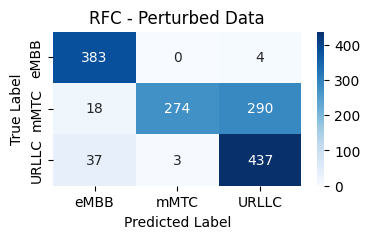

              precision    recall  f1-score   support

       URLLC     0.8744    0.9897    0.9285       387
        eMBB     0.9892    0.4708    0.6380       582
        mMTC     0.5978    0.9161    0.7235       477

    accuracy                         0.7566      1446
   macro avg     0.8205    0.7922    0.7633      1446
weighted avg     0.8294    0.7566    0.7439      1446



In [20]:
X_test_perturbed = test_data_perturbed.drop('actual_label', axis=1)
y_test_perturbed = test_data_perturbed['actual_label']

# Make predictions
y_pred_on_perturbed = RFC_Model.predict(X_test_perturbed)

# Print confusion matrix
cm = confusion_matrix(y_test_perturbed, y_pred_on_perturbed)
plt.figure(figsize=(4,2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['eMBB', 'mMTC', 'URLLC'], yticklabels=['eMBB', 'mMTC', 'URLLC'])
plt.title('RFC - Perturbed Data')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Print classification report
print(classification_report(y_test_perturbed, y_pred_on_perturbed, digits=4))

# **SYNC NOTEBOOKS**

In [21]:
%cp '/content/drive/MyDrive/Colab Notebooks/Exp22 - Slice_Classification_SupML_5GSliceNdd.ipynb' '/content/drive/MyDrive/Network_Slicing_with_ML_repo/Network-Slicing-with-ML/Notebooks/'